<a href="https://colab.research.google.com/github/Stella-kimani/.Stl_Week_14_R/blob/master/Stella_part4_Anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 4 : Anomaly detection

In [1]:
# loading the dataset
df4 <- read.csv("/content/Supermarket_Sales_Forecasting - Sales.csv")
head(df4)

,Date,Sales
,<fct>,<dbl>
1,1/5/2019,548.9715
2,3/8/2019,80.2200
3,3/3/2019,340.5255
4,1/27/2019,489.0480
5,2/8/2019,634.3785
6,3/25/2019,627.6165


In [2]:
install.packages("anomalize")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
# checking the entries of the dataset
dim(df4)

[1] 1000    2

In [4]:
library(tidyverse)
library(anomalize)
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

══ Use anomalize to improve your Forecasts by 50%! ═════════════════════════════
Business Science offers a 1-hour course - Lab #18: Time Series Anomaly Detection!
</> Learn more at: https://university.business-science.io/p/learning-labs-pro </>



In [9]:
df4$Date<- as.Date(df4$Date,format = "%m/%d/%Y") # Converts to  date datatype which we need to do as part of fata preprocessing.

In [12]:
df4[["Date"]] <- as.POSIXct(df4$Date,tz = Sys.timezone()) #This changes the date to appropriate data type.

In [13]:
library(tibbletime)

In [16]:
library(anomalize)

In [5]:
install.packages('devtools') 
devtools::install_github("business-science/anomalize")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)





✔  checking for file ‘/tmp/RtmprZ5c1V/remotes12af255c4577/business-science-anomalize-a615e6a/DESCRIPTION’
─  preparing ‘anomalize’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘anomalize_0.2.1.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [21]:
library(dplyr)
library(readr)


In [23]:
df4 = df4%>% as.tibble() #We need to convert the data frame to a tibble.

Warning message:
“`as.tibble()` is deprecated as of tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


Converting from tbl_df to tbl_time.
Auto-index message: index = Date

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

frequency = 12 seconds

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

trend = 12 seconds

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



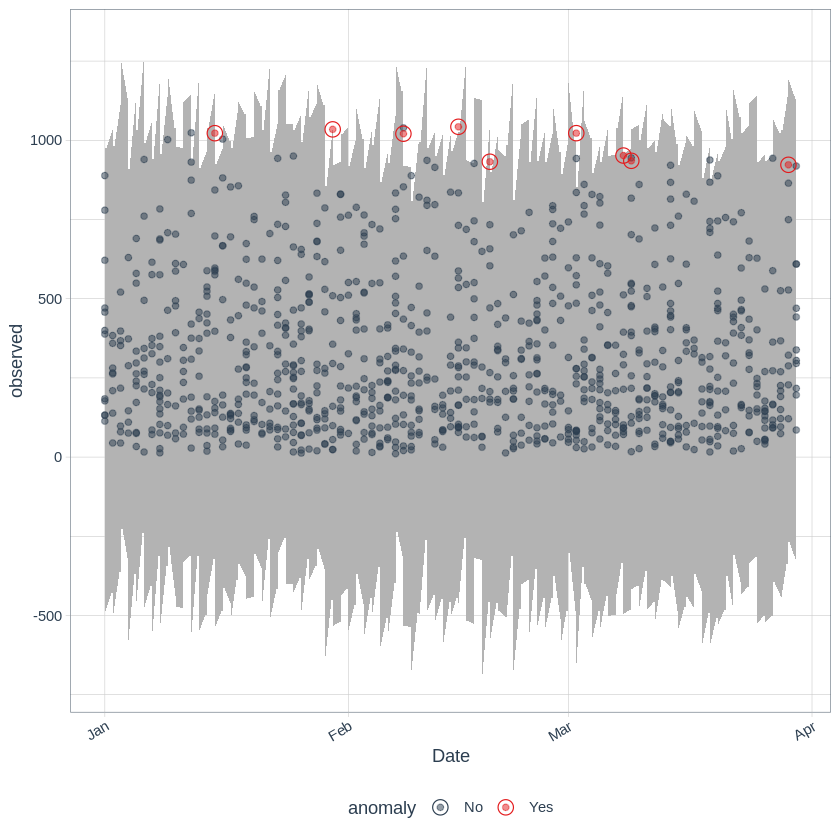

In [26]:
library(tibbletime)
library(tidyverse)
library(anomalize)
library(dplyr)
df4 %>%
    time_decompose(Sales, method = "stl", frequency = "auto", trend = "auto") %>%
    anomalize(remainder, method = "gesd") %>%
    time_recompose() %>%
    plot_anomalies(time_recomposed = TRUE, ncol = 3, alpha_dots = 0.5)

We see the lower and upper bounds around the “observed” values 
through the use of the time_recompose() function, which recomposes 
the lower and upper bounds of the anomalies around the observed values.
We can observe that there are now new columns created: “recomposed_l1” (lower limit) 
and “recomposed_l2” (upper limit).
There are anomalies in the dataset hence we conclude that there is some fraud detected.